Imports and Setup

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

players_df = pd.read_csv(r"C:\Users\apani\Desktop\Project Work\Player Performance Prediction\data\processed\players.csv")
teams_df = pd.read_csv(r"C:\Users\apani\Desktop\Project Work\Player Performance Prediction\data\processed\teams.csv")
positions_df = pd.read_csv(r"C:\Users\apani\Desktop\Project Work\Player Performance Prediction\data\processed\positions.csv")

pd.set_option('display.max_columns', None)

Basic Overview

In [3]:
players_df.shape, players_df.columns  
players_df[['first_name', 'second_name', 'team', 'element_type', 'minutes', 'total_points']].head()

,first_name,second_name,team,element_type,minutes,total_points
0,Fábio,Ferreira Vieira,1,3,0,0
1,Gabriel,Fernando de Jesus,1,4,600,42
2,Gabriel,dos Santos Magalhães,1,2,2363,117
3,Kai,Havertz,1,4,1872,97
4,Karl,Hein,1,1,0,0


Merge with Team & Position Info

In [4]:
players_df = players_df.merge(teams_df[['id', 'name']], left_on='team', right_on='id', suffixes=('', '_team'))
players_df = players_df.merge(positions_df[['id', 'singular_name']], left_on='element_type', right_on='id', suffixes=('', '_pos'))

players_df = players_df.rename(columns={
    "name": "team_name",
    "singular_name": "position"
}).drop(columns=["id_team", "id_pos"])

Top Players by Points

In [5]:
top_players = players_df.sort_values(by='total_points', ascending=False).head(10)
top_players[['first_name', 'second_name', 'team_name', 'position', 'total_points']]

,first_name,second_name,team_name,position,total_points
210,Mohamed,Salah,Liverpool,Midfielder,344
60,Bryan,Mbeumo,Brentford,Midfielder,236
111,Cole,Palmer,Chelsea,Midfielder,214
404,Alexander,Isak,Newcastle,Forward,211
411,Chris,Wood,Nott'm Forest,Forward,200
316,Jarrod,Bowen,West Ham,Midfielder,193
351,Ollie,Watkins,Aston Villa,Forward,186
359,Yoane,Wissa,Brentford,Forward,185
209,Luis,Díaz,Liverpool,Midfielder,183
396,Erling,Haaland,Man City,Forward,181


Correlation Plot

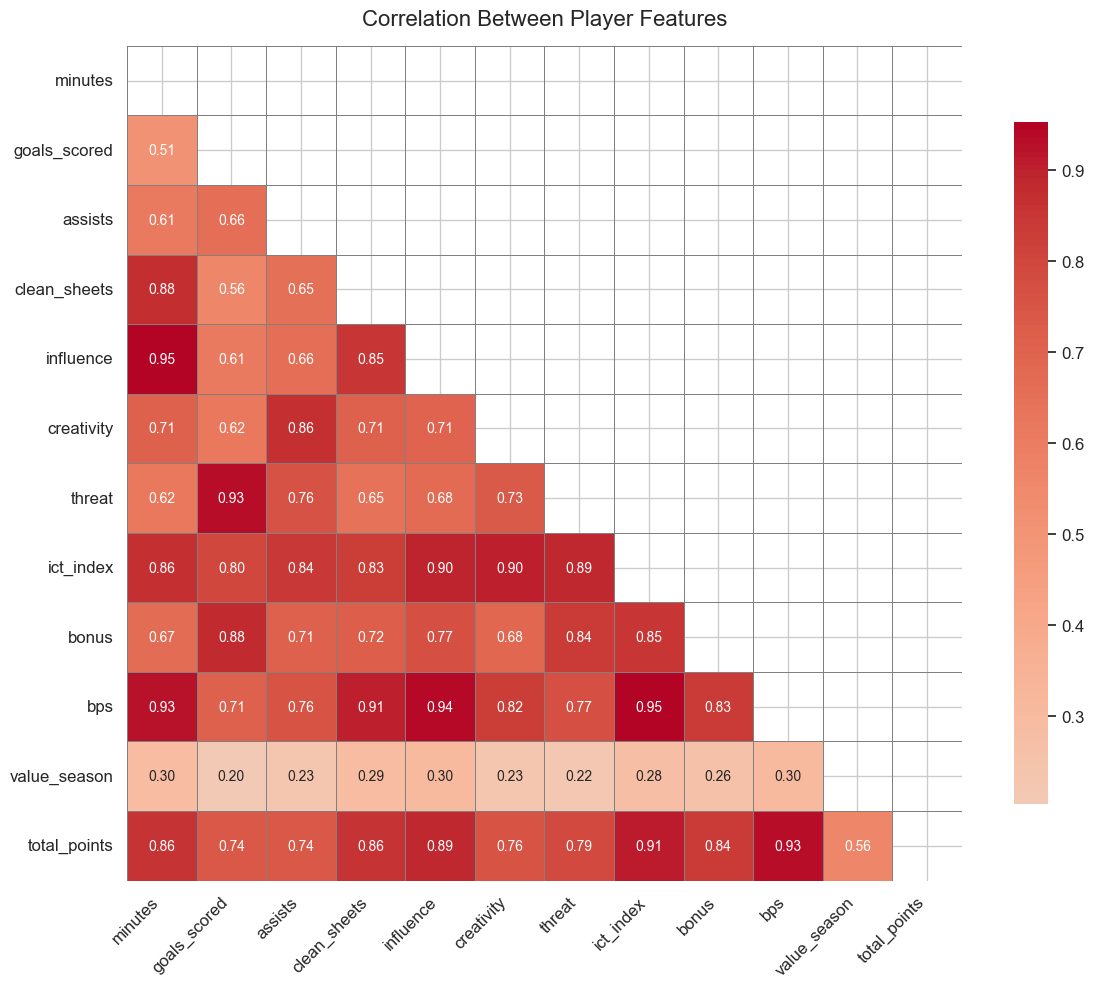

In [6]:
import numpy as np

# Filter only relevant numeric columns
relevant_columns = [
    'minutes', 'goals_scored', 'assists', 'clean_sheets', 'influence',
    'creativity', 'threat', 'ict_index', 'bonus', 'bps', 'value_season',
    'total_points'
]
corr = players_df[relevant_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid", font_scale=1.1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and better formatting
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.7,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    square=True,
    center=0,
    annot_kws={"size": 10}
)

plt.title("Correlation Between Player Features", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Position-wise Performance

C:\Users\apani\AppData\Local\Temp\ipykernel_2720\834055854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\apani\AppData\Local\Temp\ipykernel_2720\834055854.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\apani\Desktop\Project Work\Player Performance Prediction\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


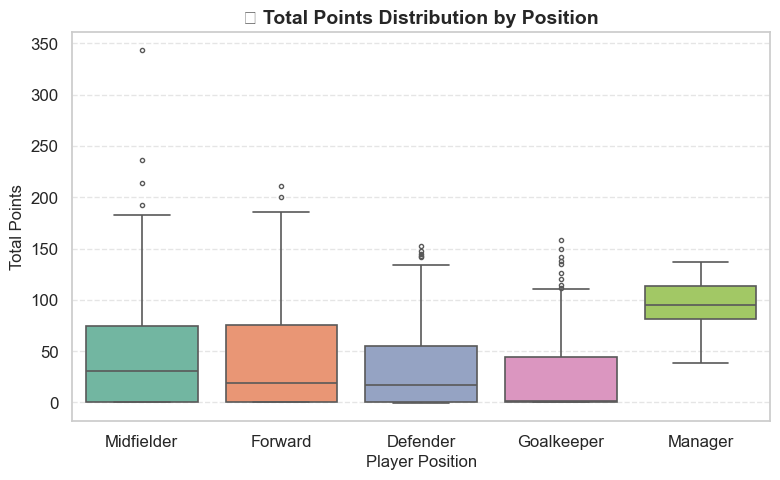

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Boxplot with subtle color and line enhancements
sns.boxplot(
    data=players_df,
    x='position',
    y='total_points',
    palette='Set2',               # Softer color palette
    linewidth=1.2,                # Slightly thicker box edges
    fliersize=3                   # Smaller outlier dots
)

# Titles and labels
plt.title("📊 Total Points Distribution by Position", fontsize=14, weight='bold')
plt.xlabel("Player Position", fontsize=12)
plt.ylabel("Total Points", fontsize=12)

# Clean grid
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Team-wise Average Points

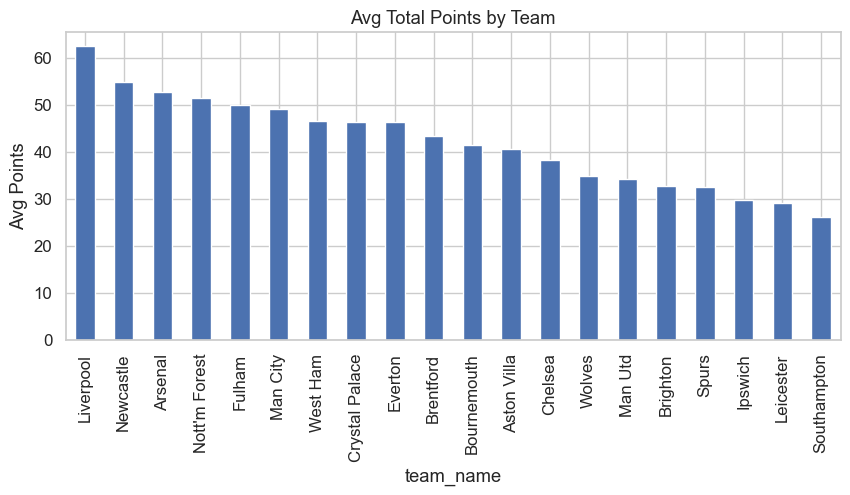

In [21]:
team_avg = players_df.groupby('team_name')['total_points'].mean().sort_values(ascending=False)
team_avg.plot(kind='bar', figsize=(10, 4), title='Avg Total Points by Team')
plt.ylabel("Avg Points")
plt.show()
